<a href="https://colab.research.google.com/github/karnali/covid_19_colab/blob/master/coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Reading the dataset https://github.com/CSSEGISandData/2019-nCoV
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-10-2020.csv')
                 

In [5]:
# Let's look at the various columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 8 columns):
Province/State    99 non-null object
Country/Region    206 non-null object
Last Update       206 non-null object
Confirmed         206 non-null int64
Deaths            206 non-null int64
Recovered         206 non-null int64
Latitude          206 non-null float64
Longitude         206 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 13.0+ KB


In [6]:
df.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude
count,206.000000,206.000000,206.000000,206.000000,206.000000
mean,575.640777,20.689320,312.640777,31.184989,11.752030
std,4822.697784,215.794845,3332.764713,21.305149,84.576291
min,0.000000,0.000000,0.000000,-41.454500,-157.498300
25%,3.000000,0.000000,0.000000,25.069200,-74.841325
50%,12.000000,0.000000,0.000000,36.030550,15.234250
75%,75.750000,1.000000,4.000000,43.870250,101.363375
max,67760.000000,3024.000000,47743.000000,64.963100,174.886000


In [7]:
# Countries affected
countries = df['Country/Region'].unique().tolist()
# print(countries)

print("\nTotal countries affected by virus: ",len(countries))


Total countries affected by virus:  115


In [8]:
#Combining China and Mainland China cases
df['Country/Region'].replace({'Mainland China':'China'},inplace=True)
countries = df['Country/Region'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus: ",len(countries))



['China', 'Italy', 'Iran (Islamic Republic of)', 'Republic of Korea', 'France', 'Spain', 'Germany', 'Others', 'Japan', 'Switzerland', 'Norway', 'Netherlands', 'UK', 'Sweden', 'Belgium', 'US', 'Denmark', 'Austria', 'Singapore', 'Malaysia', 'Hong Kong SAR', 'Bahrain', 'Greece', 'United Arab Emirates', 'Iraq', 'Iceland', 'Kuwait', 'Egypt', 'Israel', 'India', 'Australia', 'Thailand', 'San Marino', 'Taipei and environs', 'Czech Republic', 'Lebanon', 'Portugal', 'Finland', 'Canada', 'Ireland', 'Philippines', 'Brazil', 'Slovenia', 'Viet Nam', 'Indonesia', 'Romania', 'occupied Palestinian territory', 'Qatar', 'Poland', 'Algeria', 'Saudi Arabia', 'Oman', 'Argentina', 'Pakistan', 'Ecuador', 'Georgia', 'Croatia', 'Chile', 'Estonia', 'Azerbaijan', 'Peru', 'Albania', 'Macao SAR', 'Russian Federation', 'Belarus', 'Costa Rica', 'Hungary', 'Latvia', 'Mexico', 'North Macedonia', 'Slovakia', 'South Africa', 'Maldives', 'Afghanistan', 'Bosnia and Herzegovina', 'Dominican Republic', 'French Guiana', 'Luxe

In [9]:
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)

# Creating a dataframe with total no of confirmed cases for every Country/Region
Number_of_countries = len(df['Country/Region'].value_counts())
cases = pd.DataFrame(df.groupby('Country/Region')['Confirmed','Deaths'].sum())
cases['Country/Region'] = cases.index

global_cases = cases[['Confirmed','Deaths']]


dfsort = global_cases.sort_values(by = ['Deaths'], ascending = False)
print ("Countries sorted by most deaths")
display(dfsort)
dfsort.to_csv('today.csv',index=True)


Countries sorted by most deaths


,Confirmed,Deaths
Country/Region,,
China,80757,3136
Italy,10149,631
Iran (Islamic Republic of),8042,291
Republic of Korea,7513,54
Spain,1695,35
France,1784,33
US,959,28
Japan,581,10
Iraq,71,7


In [10]:
dfglobal = pd.read_csv("today.csv")
dfglobal['Death_Percent'] = round((dfglobal['Deaths'] / dfglobal['Confirmed']) *100,2)
dfglobal = dfglobal.sort_values(by = ['Death_Percent'], ascending = False)
dfglobal.head(10)


,Country/Region,Confirmed,Deaths,Death_Percent
21,Morocco,3,1,33.33
8,Iraq,71,7,9.86
1,Italy,10149,631,6.22
17,Argentina,17,1,5.88
16,San Marino,51,2,3.92
0,China,80757,3136,3.88
2,Iran (Islamic Republic of),8042,291,3.62
20,Philippines,33,1,3.03
6,US,959,28,2.92
12,Australia,107,3,2.80


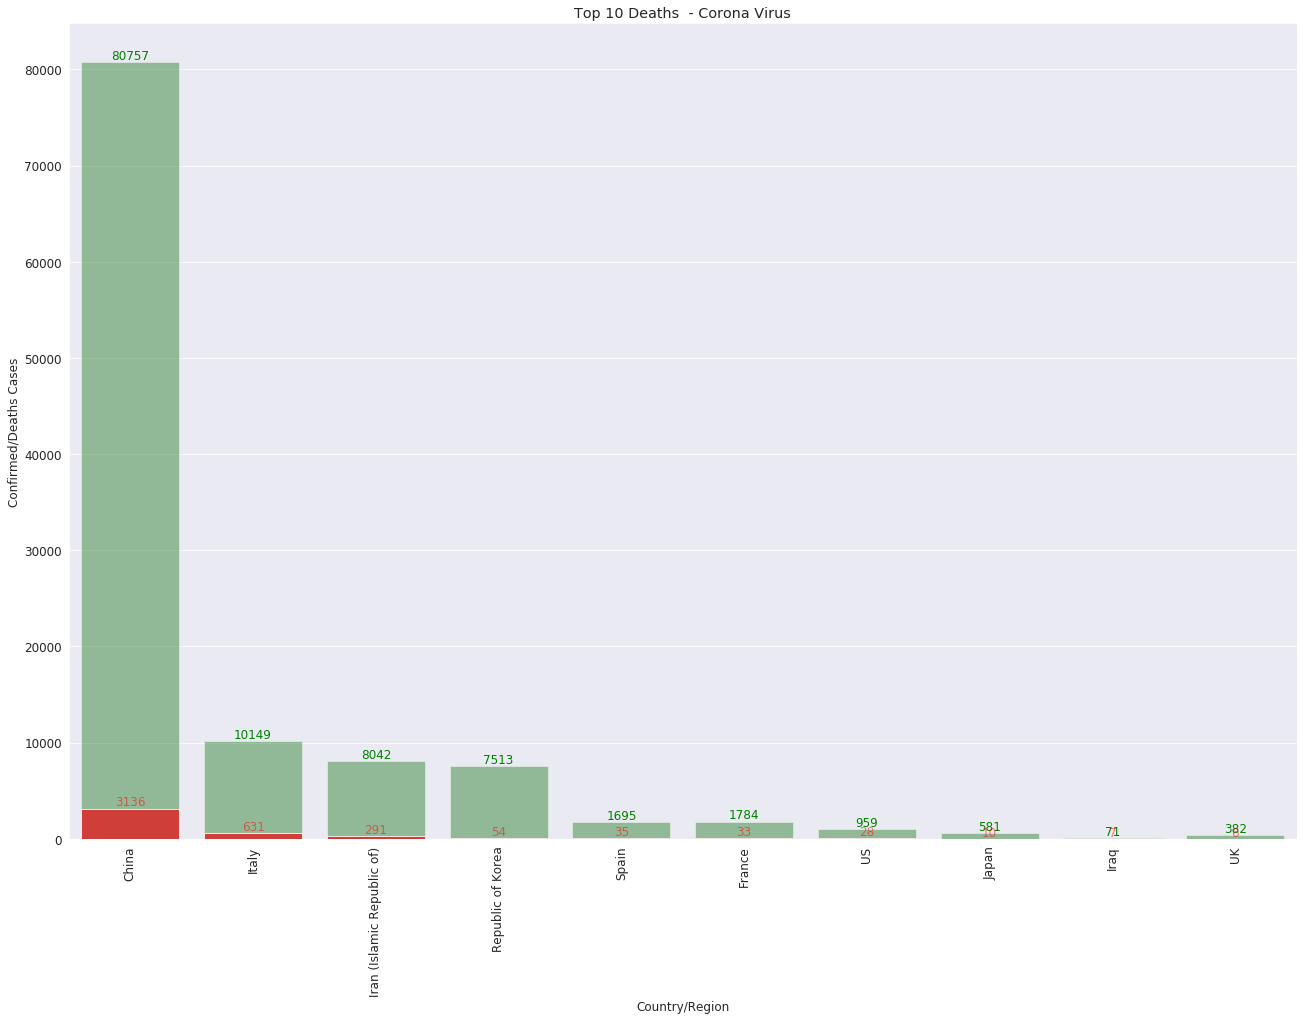

In [25]:
sns.set_style("darkgrid")
#plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.figure(figsize=(22,15))
plt.rcParams['font.family'] = "Arial"
plt.rcParams['font.size'] = "12"

dfglobal = pd.read_csv("today.csv",  skiprows = range(11,200))

g =sns.barplot(x='Country/Region',y='Confirmed',color='Green', alpha=0.4, data=dfglobal)
g =sns.barplot(x='Country/Region',y='Deaths',color='red', alpha=0.8, data=dfglobal)
g.set_ylabel('Confirmed/Deaths Cases')

for index, row in dfglobal.iterrows():
    g.text(row.name,row.Confirmed, round(row.Confirmed,2), color='Green', ha='center', va='bottom')
    g.text(row.name,row.Deaths, round(row.Deaths,2), color='red', alpha=0.5, ha='center', va='bottom')

plt.title('Top 10 Deaths  - Corona Virus')
g.set_xticklabels(dfglobal['Country/Region'], rotation='vertical', fontsize=12)
plt.show()


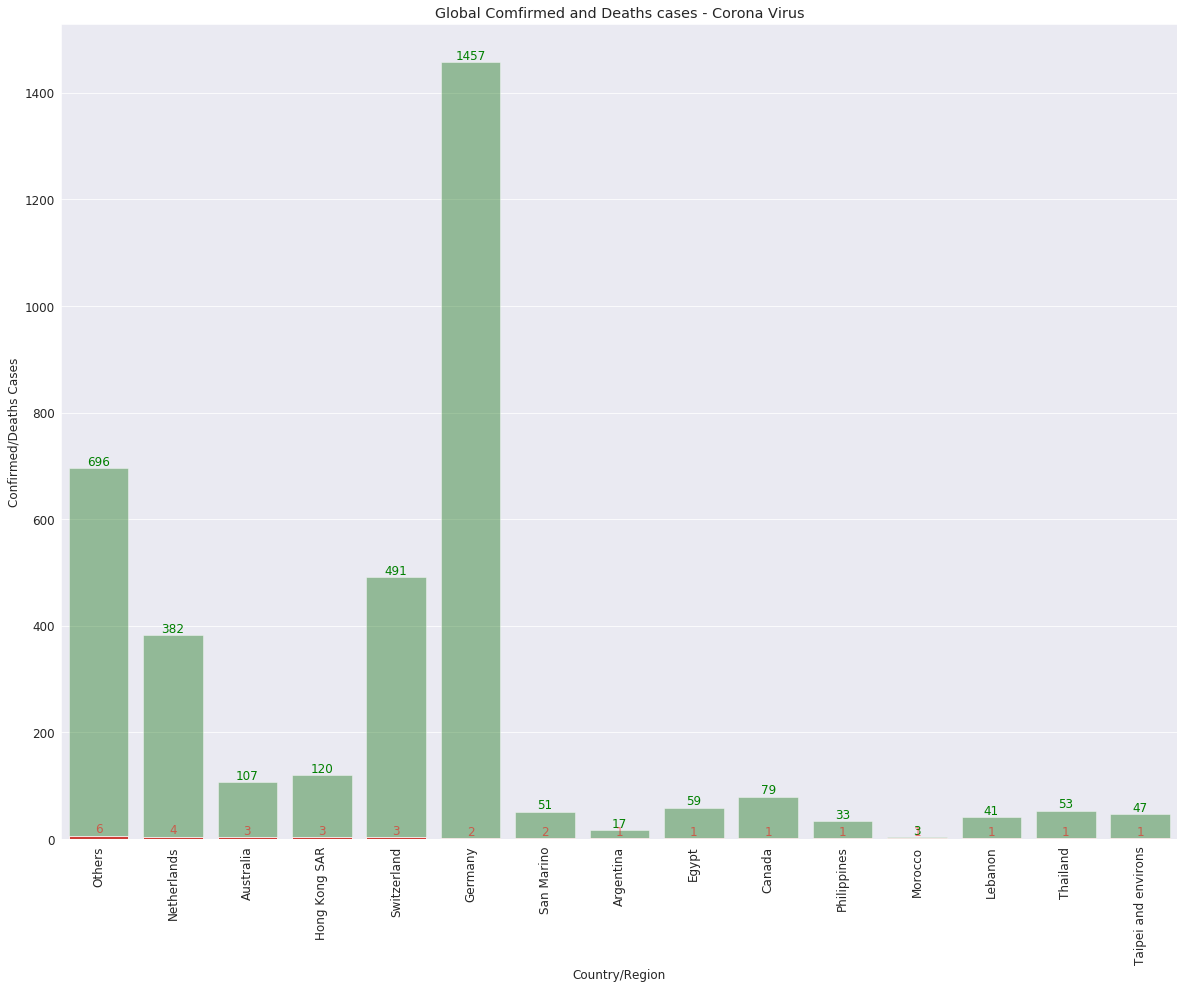

In [23]:
sns.set_style("darkgrid")
nbr_rows_to_skip = range(1,11)
nbr_rows_to_read = 15
#plt.rcParams['figure.figsize'] = (22.0, 15.0)
plt.figure(figsize=(20,15))
plt.rcParams['font.family'] = "Arial"
plt.rcParams['font.size'] = "12"

dfglobal = pd.read_csv("today.csv",  nrows=nbr_rows_to_read, skiprows=nbr_rows_to_skip)

g =sns.barplot(x='Country/Region',y='Confirmed',color='Green', alpha=0.4, data=dfglobal)
g =sns.barplot(x='Country/Region',y='Deaths', color='red', alpha=0.8, data=dfglobal)
g.set_ylabel('Confirmed/Deaths Cases')

for index, row in dfglobal.iterrows():
    g.text(row.name,row.Confirmed, round(row.Confirmed,2), color='Green', ha='center', va='bottom')
    g.text(row.name,row.Deaths, round(row.Deaths,2), color='red', alpha=0.5, ha='center', va='bottom')
    
    
plt.title('Global Comfirmed and Deaths cases - Corona Virus')
g.set_xticklabels(dfglobal['Country/Region'], rotation='vertical', fontsize=12)
plt.show()

